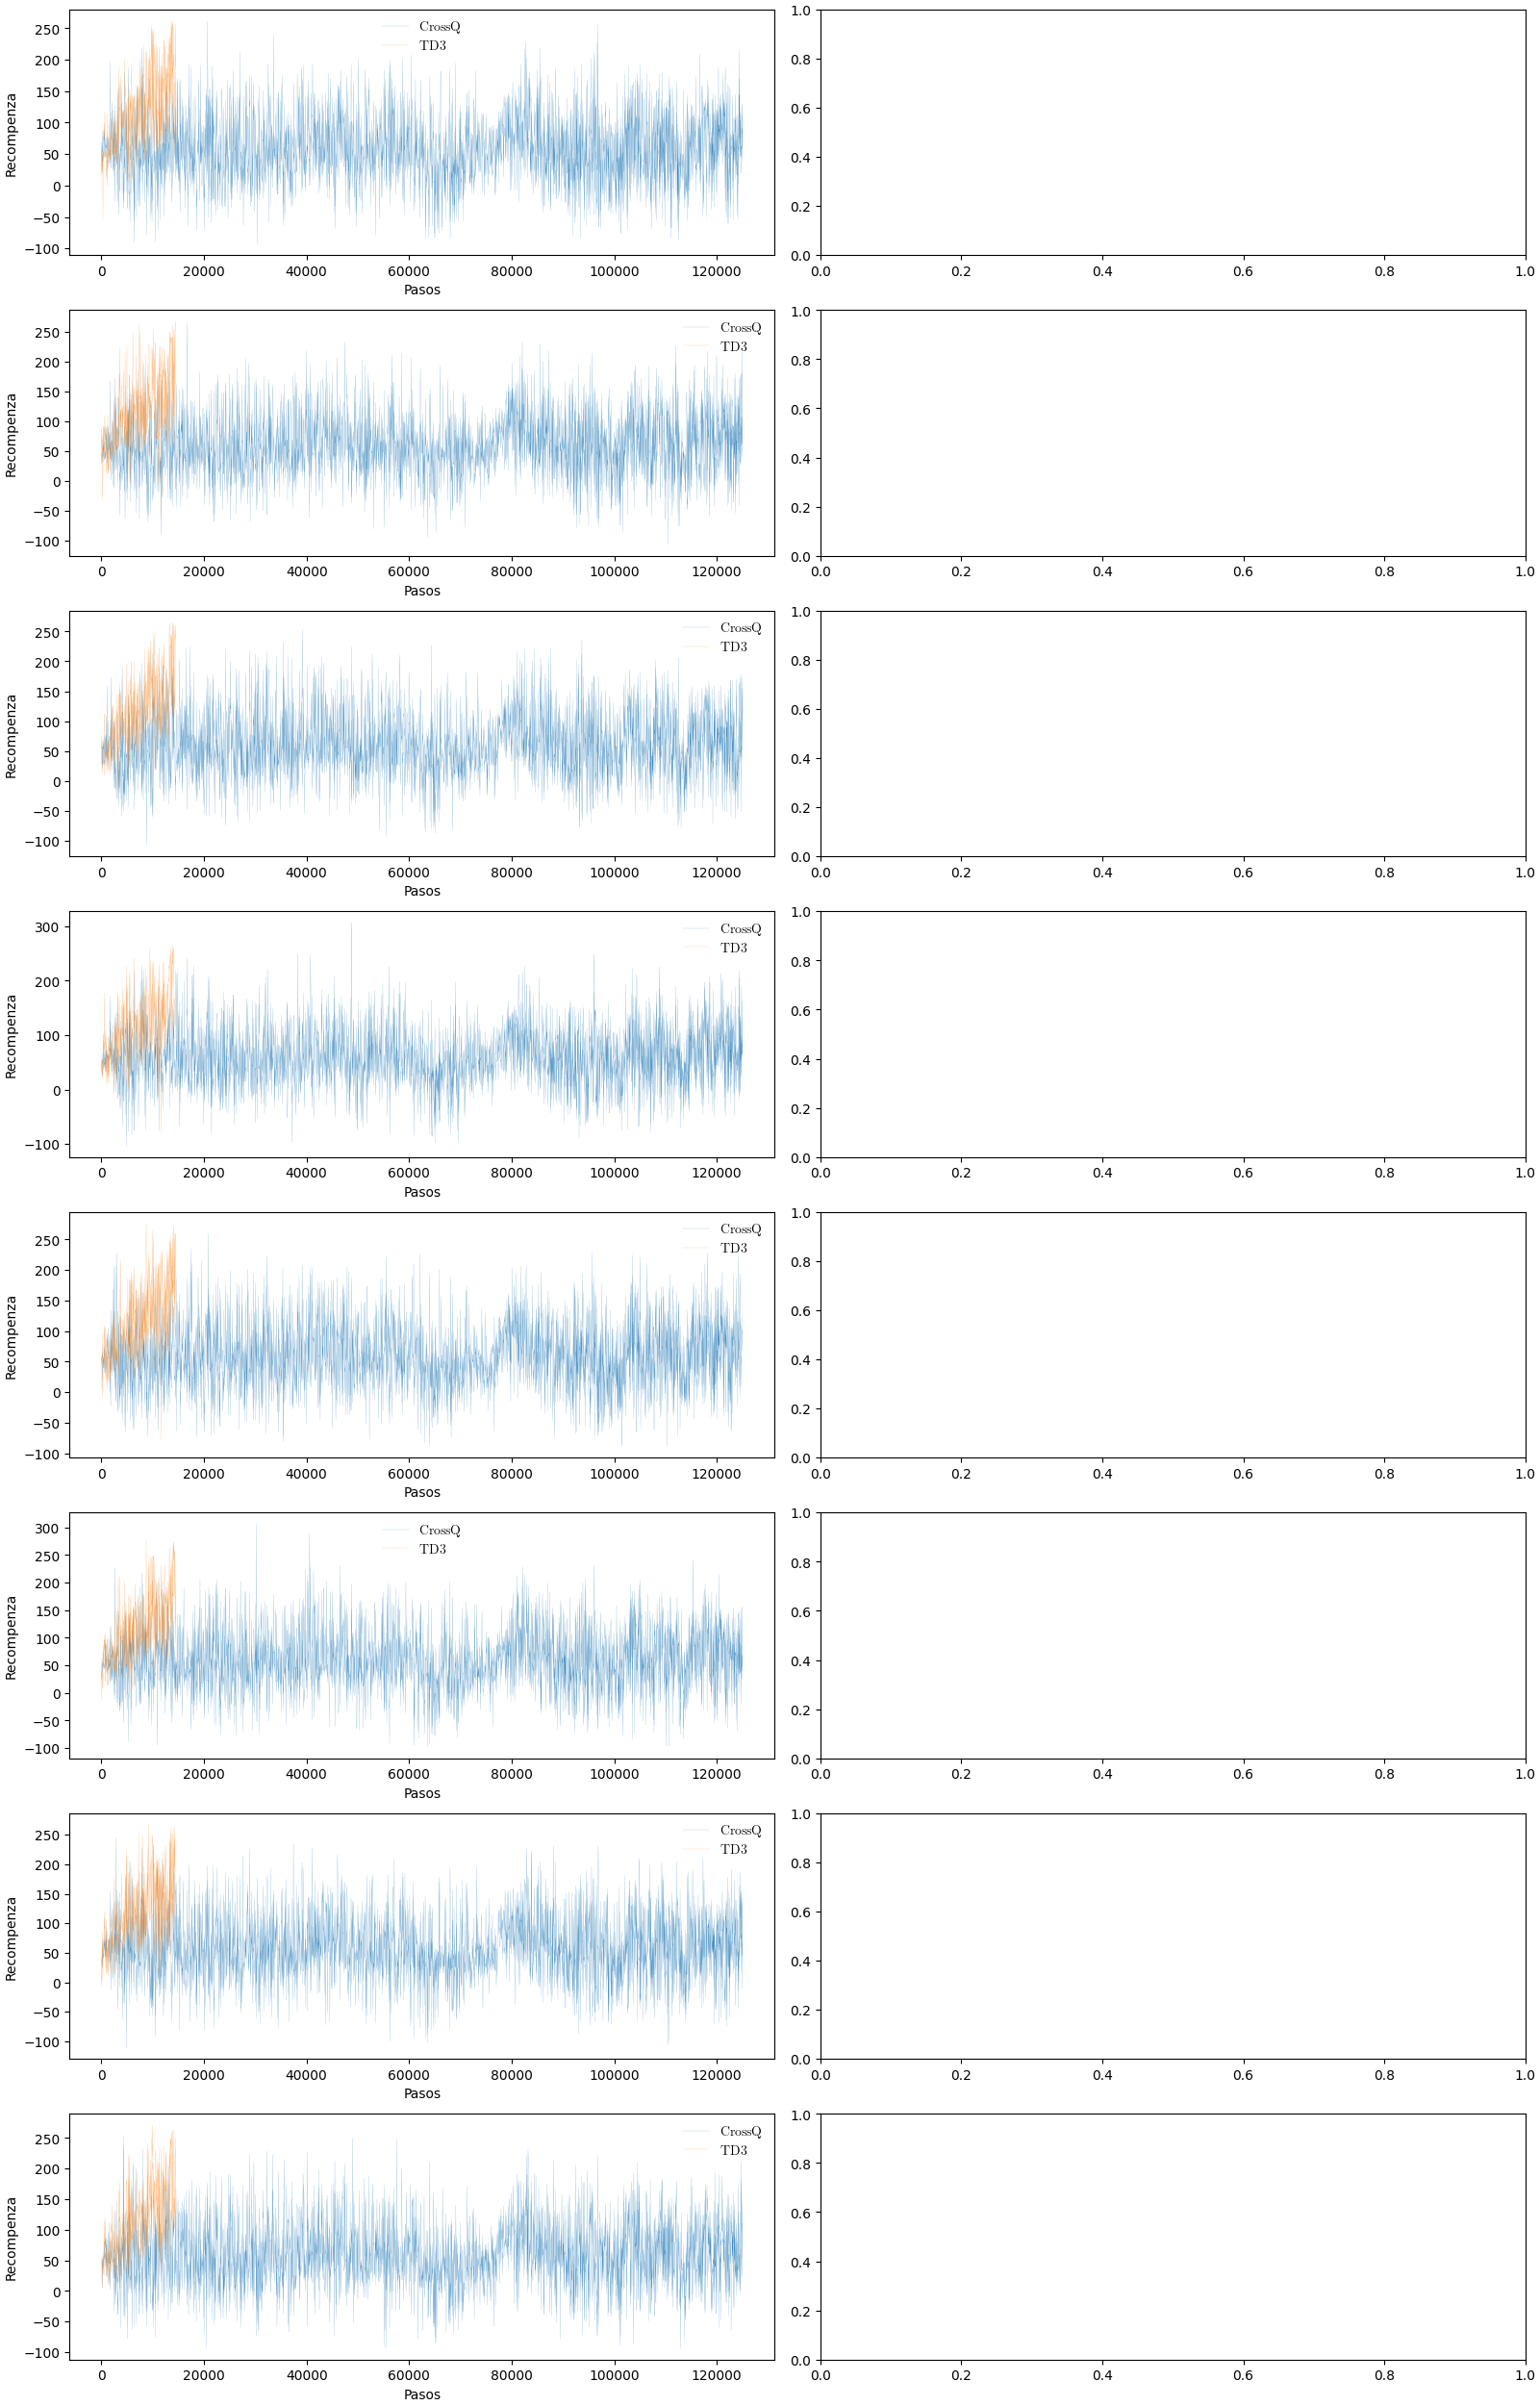

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import scienceplots

n_envs = 8

monitor_data_non_tda = [
    {
        "path": f"tmp/NonTDA/{alg}/",
        "name": f"{alg}"
    } 
    for alg in ["CrossQ" , "TD3"]
]

monitor_data_tda = [

]

fig = plt.figure(constrained_layout=True, figsize=(16, 25))
gs = gridspec.GridSpec(n_envs, 2, figure=fig)

ax_non_tda = [
    [i, fig.add_subplot(gs[i, 0])]
    for i in range(n_envs)
]
ax_tda = [
    [i, fig.add_subplot(gs[i, 1])]
    for i in range(n_envs)
]

with plt.style.context('science'):
    for data in monitor_data_non_tda:
        for idx, ax in ax_non_tda:
            path = data["path"] + f"{idx}.monitor.csv"
            df = pd.read_csv(path, skiprows=1)
            ax.plot(df['l'].cumsum(), df['r'], label=data["name"], linewidth=0.1)
            ax.set_xlabel('Pasos')
            ax.set_ylabel('Recompenza')
            ax.legend()
            ax.grid()
    for data in monitor_data_tda:
        for idx, ax in ax_tda:
            path = data["path"] + f"{idx}.monitor.csv"
            df = pd.read_csv(path, skiprows=1)
            ax.plot(df['l'].cumsum(), df['r'], label=data["name"], linewidth=1)
            ax.set_xlabel('Pasos')
            ax.set_ylabel('Recompenza')
            ax.legend()
            ax.grid()
    plt.show()


In [2]:
import skvideo.io
from base64 import b64encode
from IPython.display import HTML

def show_video(video_path, video_width = 500):
    video_file = open(video_path, "r+b").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")

In [3]:
from eeg_rl.env import EEGNonTdaEnv
from sbx import TD3

model = TD3.load("model/non_tda/TD3_non_tda_eeg_walking_model.zip")
non_tda_env = EEGNonTdaEnv(window_length=10, eeg_channels=64)
obs, _ = non_tda_env.reset()
frames = []


for _ in range(200):
    frame = non_tda_env.env.sim.renderer.render_offscreen(camera_id=0)
    frames.append(frame)
    a, _ = model.predict(obs, deterministic=True)
    obs, _, _, _, _ = non_tda_env.step(a)
non_tda_env.env.close()

MyoSuite:> Registering Myo Envs


/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoSarcArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoFatiArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoArmReachRandom-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in reg

    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(


In [4]:
import numpy as np

skvideo.io.vwrite(
    "non_tda_walk_sac.mp4",
    np.asarray(frames),
    inputdict={"-r": "100"},
    outputdict={"-r" : "100", "-pix_fmt": "yuv420p"})

show_video("non_tda_walk_sac.mp4")

In [29]:
from eeg_rl.env import EEGTdaEnv
from sbx import SAC

model = SAC.load("model/tda_64_100K/SAC_tda_eeg_walking_model.zip")
tda_env = EEGTdaEnv(window_length=10, eeg_channels=64, n_filters=64)
obs, _ = tda_env.reset()
frames = []


for _ in range(200):
    frame = tda_env.env.sim.renderer.render_offscreen(camera_id=0)
    frames.append(frame)
    a, _ = model.predict(obs, deterministic=True)
    obs, _, _, _, _ = tda_env.step(a)
tda_env.env.close()

/workspaces/document/.venv/lib/python3.9/site-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 51.53GB > 18.99GB
  warnings.warn(
/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
/workspaces/document/.venv/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(


In [30]:
import numpy as np

skvideo.io.vwrite(
    "tda_walk_sac.mp4",
    np.asarray(frames),
    inputdict={"-r": "100"},
    outputdict={"-r" : "100", "-pix_fmt": "yuv420p"})

show_video("tda_walk_sac.mp4")